***NOTE:*** This assumes that [RISE](https://github.com/damianavila/RISE) is installed.  If so, just click the bar chart in the toolbar above, and the presentation should begin.  Note that in edit mode, you can easily change some slide types of cells below, with

 * `shift-i` : toggle slide
 * `shift-b` : toggle subslide
 * `shift-g` : toggle fragment


Once the slideshow is running, the comma key "," will show or hide the buttons for you to press to close the slideshow, get help, or navigate.  You can still navigate using the arrow keys, and so on.

1. Open a command prompt (Terminal, Anaconda Powershell Prompt, Git BASH, shell, etc.)

2. Run
```bash
conda env create moble/gw_matched_filtering_demo
```

3. Once you've done that, run
```bash
conda activate gw_matched_filtering_demo
```

4. Leave the command prompt open for now

# Gravitational-wave astronomy with real data

## Matched filtering

# Introduction

  - Gravitational waves (GWs) are like sound waves, except...
    - GW medium is spacetime itself (no matter needed)
    - Transverse rather than longitudinal

  - LIGO is an enormous microphone
    - We could actually hear (very loud) GWs with our own ears
    - We can (and will!) hear LIGO data

  - But there’s a lot of noise
    - Earthquakes, storms, logging, traffic, shotguns

  - We need a good way of digging signal out of the noise

# Outline

Overtly:
  - Sounds of gravitational waves
  - Sounds of LIGO
  - Fourier transforms (FFTs)
  - Matched filtering

Covertly:
  - Data analysis
  - Python
  - Jupyter notebook
  - Github

The ostensible purpose of this talk is to introduce you to matched filtering, which is the basic method that GW detectors use in searching for and measuring GW signals.  But that's a pretty narrow purpose, and most of you will not get involved in GWs.  So I want to also give you some exposure to a few other ideas that hopefully will have more broad application to all of you when you go into other fields.  And we'll use matched-filtering as a way into those other ideas.

So ostensibly, the outline of this activity starts off with introducing you to the sounds of GWs.  I'll make this analogy that LIGO is just an extraordinary microphone, and we'll listen to the sounds a GW makes, and the sounds of the LIGO instrument itself.  Then, we'll see that FFTs are a really powerful way of analyzing these sounds, and matched filtering is a really sensitive way of measuring those FFTs.

But of course, while we're doing that, I also want to give you a little flavor of data analysis.  Pretty much all of you either are working on or will work on data analysis at some point, and there are some very general rules and ideas that can be applied to basically any type of data analysis.  So I'll want to use this stuff as a sort of analogy for other types of data analysis, so hopefully you can apply these principles to your own work.

Whenever you do any data analysis, you'll probably be writing code to do it.  As scientists especially, that code should be open-source because that's crucial to reproducibility, and so that your code can be used by others to build on your work — which is good for science, and good for you personally.  But when working on open-source code, the de facto meeting place is github, which is home to most of the major open-source scientific projects (among many others).  In fact, many employers look at your github presence as if it were part of your resume — as evidence of your ability to write code in various languages, and interact well with others.  You can start out just by making an account, and downloading a package that you want to use.  Then you can open issues (bug reports) if you find any problems or have any questsion.  As you get experience, you can fork other projects and create pull requests for fixes or new features you add to other people's code, and even create your own projects.  One easy way to get started with pull requests is just to improve the documentation for some project that you've used.

On a more immediate level, I also hope to give you the impression that python is a useful language for fast prototyping, and investigating your data, and nothing enables that interactivity better than Jupyter.

# Jupyter notebooks

<br /><br />

  - Run a live session of python (or basically any other language)
  - Manipulate files, write code, interact with data, make plots, take notes, give presentations, ...


  - You don't need to know python
  - Put cursor in box with code and hit Shift-Enter

So first, I just want to introduce how we're working here.  Who here has used python before?

Python is really dynamic, and powerful, but also a lot simpler than most other languages.  It's not always the fastest at any computation, but since most of your time is spent writing programs (rather than running them), that's not usually a big problem.  And new developments are making python just as fast as even C/C++ in a lot of cases.

Now, we throw in the Jupyter notebook.  Who here has used Mathematica before?

Well the Jupyter notebook looks and acts like a nice version of Mathematica.  The notebook is connected to a live session of python.  It has these code cells that you run, and you can see the results.  So click on the first cell, and hit Shift+Enter.

Mathematica is better at symbolic math (for now).  But otherwise, python is more useful and general.  And the Jupyter notebook makes it better at interactive stuff.  So here's my unsolicited advice: if you're deciding what programming language to learn, go with python.  There are nerdier options out there, but not many more broadly useful options.  And if you're using python interactively, you'll want to us Jupyter (which is just a different interface) or -- better yet -- the Jupyter notebook.

# Basic idea of matched filtering

  * Raw detector data $d(t)$
  * Possible simulated data $s(t)$
  * Measure *constructive* interference

\begin{equation*}
  \text{"Energy"} = \int_{-\infty}^{\infty} \left[ d(t) + s(t) \right]^2\, dt
\end{equation*}

# Time offset

\begin{align*}
  s(t) \to s(t + \delta t)
\end{align*}

\begin{align*}
  \text{Energy}
  &\to \int \left[ d(t) + s(t + \delta t) \right]^2\, dt \\
  &= \int \left[ d(t) \right]^2\, dt + 2\int \left[ d(t)\, s(t + \delta t) \right]\, dt + \int \left[ s(t + \delta t) \right]^2\, dt \\
  &= \int \left[ d(t) \right]^2\, dt + 2 \int \left[ d(t)\, s(t + \delta t) \right]\, dt + \int \left[ s(t) \right]^2\, dt
\end{align*}

<br />

Only the middle term changes

\begin{equation*}
  \text{"Match"} = \max_{\delta t} \int d(t)\, s(t + \delta t)\, dt
\end{equation*}

\begin{equation*}
  \text{"Match"} = \max_{\delta t} \sum_{t_i} d(t_i) \, s(t_i + \delta t)\, \Delta t
\end{equation*}

# Two big problems

<br /><br />

  * This is slow.  Can we make it faster?
  * There's a lot of noise.  Can we reduce its effect?

Yes, if we use Fourier transforms!

# (Discrete) Fourier transforms

<br /><br />

$$
s(t) = \sum_{i} \left[ \tilde{s}_i\, \sin (2\,\pi\,f_i\,t + \phi_{s,i}) \right]
$$

Discrete frequencies: $f_i$

FT amplitude: $\tilde{s}_i$

FT phase: $\phi_{s,i}$

# Equivalence by Parseval-Plancherel

<br /><br /><br />

  \begin{equation*}
    \sum_{t_i} d(t_i) \, s(t_i + \delta t)\, \Delta t
    \quad = \quad
    \sum_{i} \tilde{d}_i \, \tilde{s}_i\, \cos \left( \phi_{d,i} - \phi_{s,i} - 2 \pi f_i \delta t\right) \Delta f
  \end{equation*}

So far, there's no reason to prefer doing this calculation as a function of time or of frequency.  Naively, if we look at these formulas, the sum over frequencies looks like it would be slower because we have to do two FTs in the first place just to get the data.

But in either case, it must be slow, because we'll have to do these sums for all the different values of $\delta t$, and pick which one is the best.  But this is where we find the big difference.  If you look at the sum over frequencies, it turns out that that's actually an "inverse" Fourier transform, which only has to be done once to get *every* value for every $\delta t$, and can be done *extremely* efficiently.

\begin{equation*}
  \text{"Match"} = \max \left[ \text{FFT} \left( \tilde{d} \tilde{s} \right) \right]
\end{equation*}

# Making it *fast*

<br /><br />

The Fast Fourier Transform (FFT) makes this *tens of thousands* of times faster

The FFT is one of the more remarkable algorithms in all of computing, because it can make things *so* much faster.

So now we've accomplished our first two improvements: including time offsets and making it faster.  Now, we have to deal with all that noise.

# Handling noise

<img src="files/70sEqualizer.jpg" width="1200px">

# Handling noise

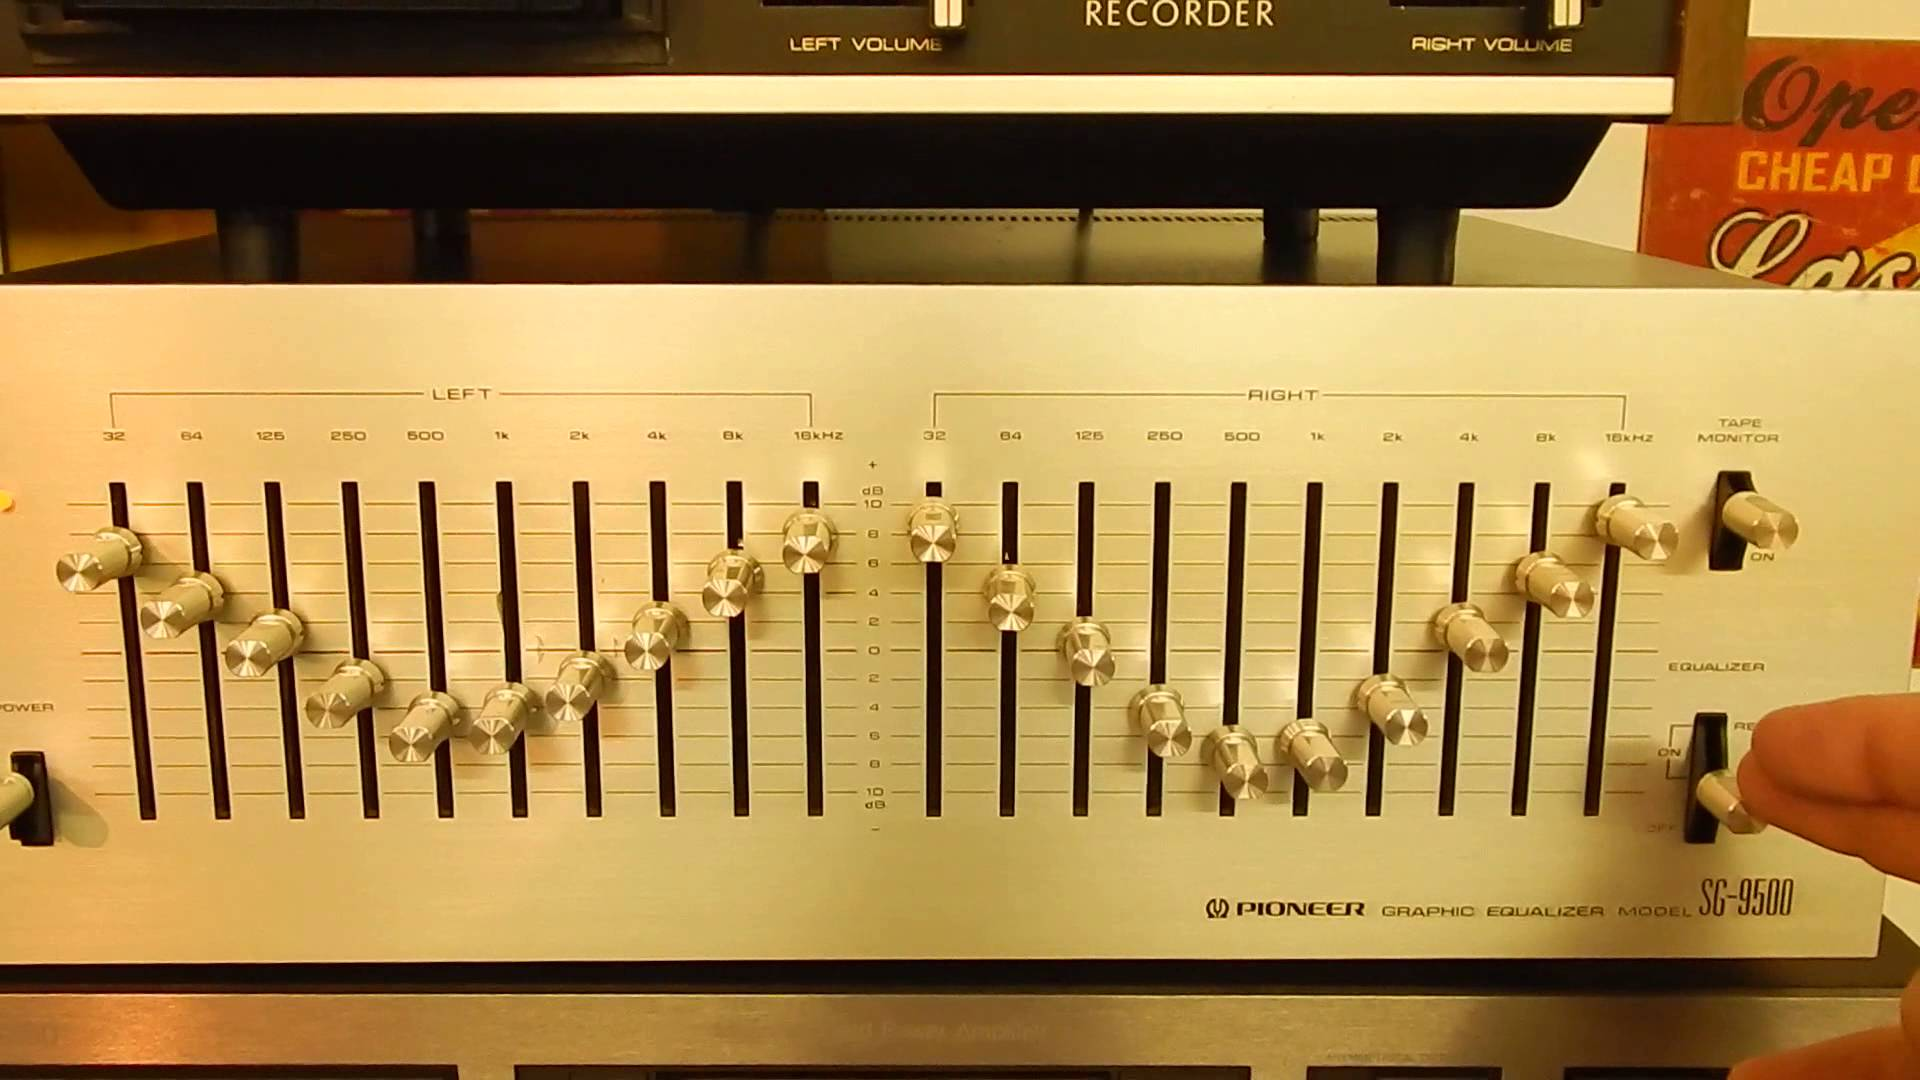

# Handling noise

<br /> <br /> <br /> <br />

  \begin{equation*}
    \text{Match}
    = \max \left[ \mathrm{FFT}\left( \frac{\tilde{d}} {\tilde{n}}\, \frac{\tilde{s}} {\tilde{n}} \right) \right]
  \end{equation*}
  
<br /> <br />

# Conclusions

Matched filtering:

  - Current GW detectors are like giant microphones
  - There's lots of noise
  - So we filter the data and test for signals

# Conclusions

Data analysis:

  - FFTs are great for time series (any periodic signal)
  - Python and Jupyter notebooks are really useful
  - Look at your data in as many ways as possible
  - Don't blindly trust hand-me-down algorithms
  - Don't blindly trust your results
    - Think about whether they make sense
    - Understand all the features
    - Things you don't understand may lead to discovery

# Notebook outline

2. Listening to gravitational waves
  - What does a GW sound (and look) like?
3. Listening to detector data
  - Our data has a *lot* of noise
4. Digging signal out of noise manually
  - Manipulate the signal to hear the parts that *you think* matter
5. Digging signal out of noise automatically
  - Manipulate the signal to eliminate the parts that are always there
6. Digging signal out of noise with a model waveform
  - Manipulate the signal to find what you want to find...
  - Time-domain stuff here!
7. Speeding up the process for LIGO searches
  - How LIGO really does it
8. More detections!
  - Try your hand at data analysis with newer detections

# github.com/moble/MatchedFiltering

Go to

<center><span style="color:blue">github.com/moble/MatchedFiltering</span></center>

and click "launch binder"

<br />

<span style="color:red">***NOTE:*** Be careful when listening to any sounds.  Many of them get very loud very suddenly.  Be prepared to move your headphones away from your head or reduce the volume very quickly.</span>